# A-B Comparison of two models

In this notebook, we will see how to compare two models on multiple metrics.
This is especially useful if you have a complex problem and want to see if your new model is better than the old one.
Because there are many aspects to it, one usually has to make some trade-offs.
For example, you may have to convince the manager that the longer runtime is worth the better accuracy.

For this, we have some nice plots available.

In [1]:
import pandas as pd

data_a = pd.read_csv("data_a.csv").set_index("instance_id")

data_b = pd.read_csv("data_b.csv").set_index("instance_id")

In [2]:
import random


def perturb(x: float, mean_diff: float, std_diff: float) -> float:
    return x * (1 + random.normalvariate(mean_diff, std_diff))


xs = [4, 5, 6, 5, 3, 4, 9, 6, 4, 5, 6, 11, 14, 7]
data_a = pd.DataFrame(
    {
        "mean_delivery_time_to_customer": [10 * perturb(x, 0.0, 0.05) for x in xs],
        "max_delivery_time_to_customer": [10 * perturb(x, 0.0, 0.05) for x in xs],
        "mean_tour_length_for_drivers": [5 * perturb(x, 0.0, 0.05) for x in xs],
        "max_tour_length_for_drivers": [5 * perturb(x, 0.0, 0.05) for x in xs],
        "revenue": [100 * perturb(x, 0.0, 0.05) for x in xs],
        "satisfaction_score": [20 * perturb(x, 0.0, 0.05) for x in xs],
    }
)

data_b = pd.DataFrame(
    {
        "mean_delivery_time_to_customer": [10 * perturb(x, 0.02, 0.05) for x in xs],
        "max_delivery_time_to_customer": [10 * perturb(x, -0.05, 0.05) for x in xs],
        "mean_tour_length_for_drivers": [5 * perturb(x, 0.02, 0.05) for x in xs],
        "max_tour_length_for_drivers": [5 * perturb(x, -0.1, 0.05) for x in xs],
        "revenue": [100 * perturb(x, 0.0, 0.05) for x in xs],
        "satisfaction_score": [20 * perturb(x, 0.0, 0.05) for x in xs],
    }
)

In [3]:
data_a

,mean_delivery_time_to_customer,max_delivery_time_to_customer,mean_tour_length_for_drivers,max_tour_length_for_drivers,revenue,satisfaction_score
0,38.537396,40.443926,19.630812,19.490487,380.088047,80.636380
1,50.879821,48.817125,25.356798,23.577827,534.284725,95.010583
2,62.397409,58.998431,31.350559,28.464602,628.183575,123.203268
3,47.631870,48.893366,23.901291,25.753835,477.759461,103.356773
4,28.777666,31.528921,14.582667,14.429674,308.701736,62.232883
5,40.066295,37.288185,19.388039,21.115545,418.850704,74.496282
6,91.163860,90.869129,38.845595,43.372489,895.600418,185.120337
7,62.259255,60.726782,30.463116,30.502659,594.415629,118.468293
8,39.630958,36.932649,19.561249,20.389518,421.552800,69.307681
9,53.633076,51.592921,22.897211,25.150403,564.765348,94.195973


In [4]:
data_b

,mean_delivery_time_to_customer,max_delivery_time_to_customer,mean_tour_length_for_drivers,max_tour_length_for_drivers,revenue,satisfaction_score
0,44.630197,35.614128,19.080052,18.773129,398.186252,82.650953
1,49.839474,46.314061,24.192706,21.290383,523.883922,98.593900
2,60.434704,62.743640,31.478181,27.447223,591.260041,135.199113
3,53.401760,47.541170,24.017182,21.675836,476.613594,98.432477
4,29.866996,26.191900,15.810392,13.846607,292.804250,64.890646
5,43.806495,35.879694,19.427705,17.115426,390.035030,80.315703
6,100.281660,88.562010,45.484533,39.611833,898.050992,173.225644
7,62.157639,56.438901,30.002341,23.825725,586.884263,112.316171
8,37.817400,37.489592,18.484193,18.392120,416.372736,76.012694
9,48.874528,52.550592,26.021210,23.003515,485.891107,102.647263


In [5]:
data_b.columns

Index(['mean_delivery_time_to_customer', 'max_delivery_time_to_customer',
       'mean_tour_length_for_drivers', 'max_tour_length_for_drivers',
       'revenue', 'satisfaction_score'],
      dtype='object')

In [6]:
from scatter_with_performance_zones import plot_comparison_grid

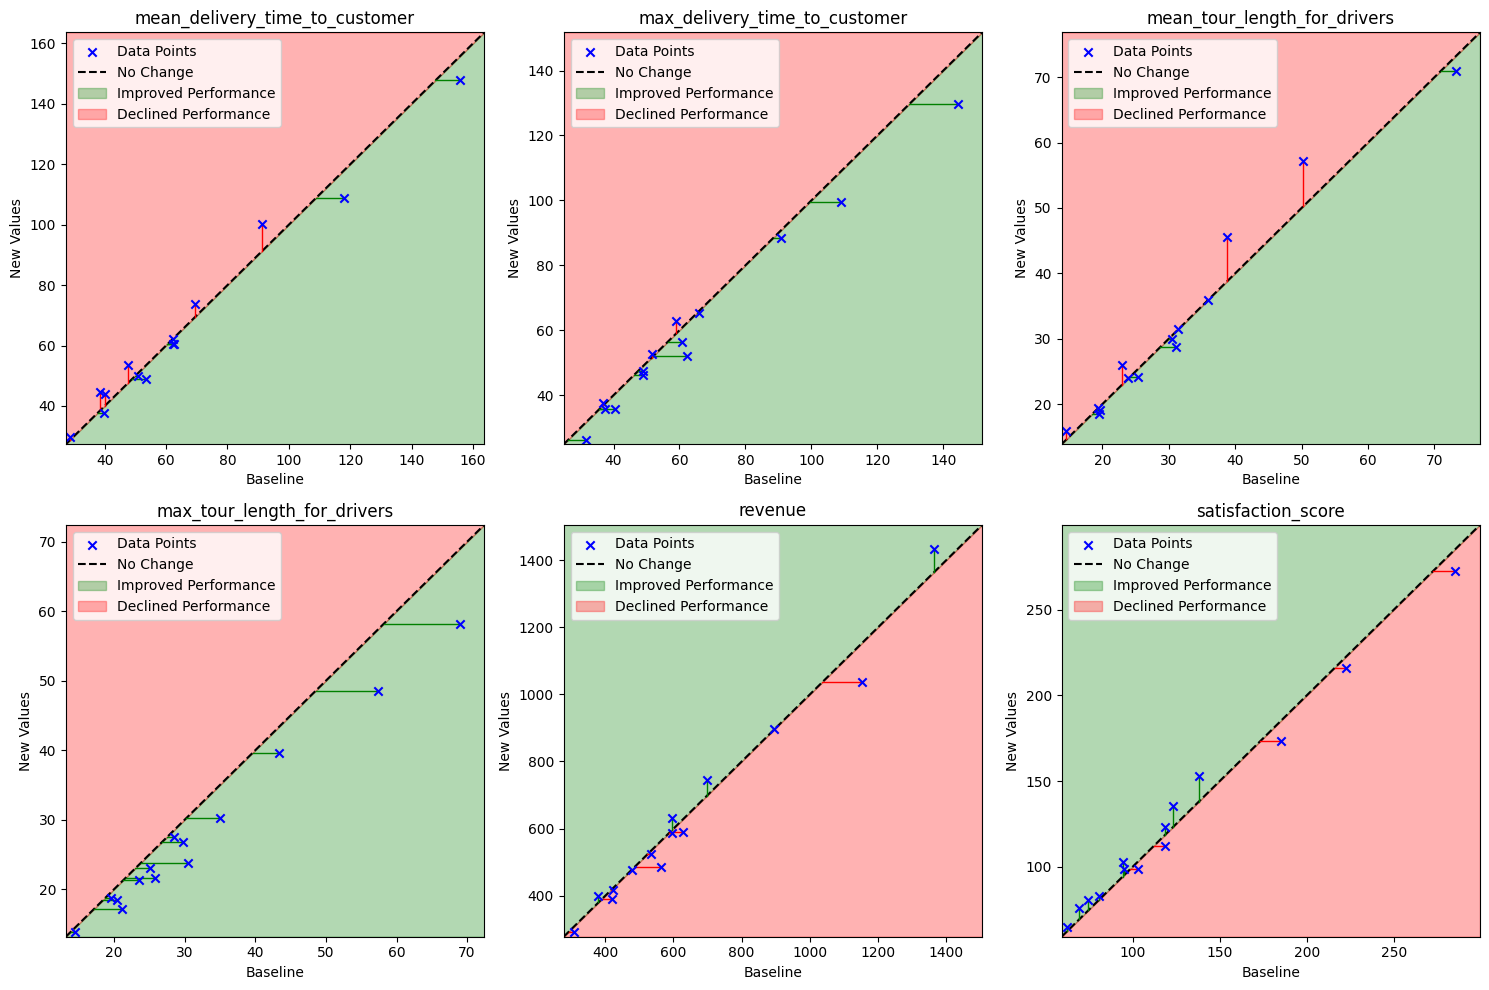

In [7]:
from matplotlib import pyplot as plt

plot_comparison_grid(
    data_a,
    data_b,
    [
        ("mean_delivery_time_to_customer", "min"),
        ("max_delivery_time_to_customer", "min"),
        ("mean_tour_length_for_drivers", "min"),
        ("max_tour_length_for_drivers", "min"),
        ("revenue", "max"),
        ("satisfaction_score", "max"),
    ],
    n_cols=3,
)
plt.show()